<a href="https://colab.research.google.com/github/lover-swan/project2_2/blob/main/EDA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/project2_2/2019-Oct.csv')

In [ ]:
data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
...,...,...,...,...,...,...,...,...,...
42448759,2019-10-31 23:59:58 UTC,view,2300275,2053013560530830019,electronics.camera.video,gopro,527.40,537931532,22c57267-da98-4f28-9a9c-18bb5b385193
42448760,2019-10-31 23:59:58 UTC,view,10800172,2053013554994348409,NaN,redmond,61.75,527322328,5054190a-46cb-4211-a8f1-16fc1a060ed8
42448761,2019-10-31 23:59:58 UTC,view,5701038,2053013553970938175,auto.accessories.player,kenwood,128.70,566280422,05b6c62b-992f-4e8e-91f7-961bcb4719cd
42448762,2019-10-31 23:59:59 UTC,view,21407424,2053013561579406073,electronics.clocks,tissot,689.85,513118352,4c14bf2a-2820-4504-929d-046356a5a204


In [ ]:
data.event_type=data.event_type.astype('category')
data.brand=data.brand.astype('category')
data.price=data.price.astype('int16')
data.product_id=data.product_id.astype('int32')
data.user_id=data.user_id.astype('int32')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 9 columns):
 #   Column         Dtype   
---  ------         -----   
 0   event_time     object  
 1   event_type     category
 2   product_id     int32   
 3   category_id    int64   
 4   category_code  object  
 5   brand          category
 6   price          int16   
 7   user_id        int32   
 8   user_session   object  
dtypes: category(2), int16(1), int32(2), int64(1), object(3)
memory usage: 1.8+ GB


In [ ]:
count_type=data.event_type.value_counts()

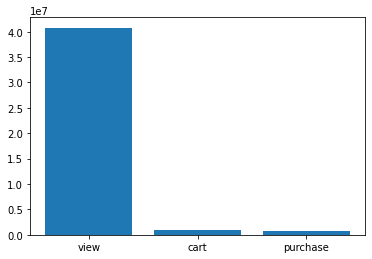

In [ ]:
plt.bar(count_type.index,count_type)
plt.show()

In [ ]:
#클릭-장바구니 전환율 

In [ ]:
count_type.cart/count_type['view'] #2.3%

0.022720197519340585

In [ ]:
#장바구니-구매 전환율 

In [ ]:
count_type.purchase/count_type.cart #80%

0.8017659705822673

In [ ]:
#클릭-구매 전환율 

In [ ]:
count_type.purchase/count_type['view'] #1.8%

0.01821628121591493

In [ ]:
# 장바구니에서 구매로의 전환율은 80%로 양호 
# 따라서 클릭-구매/클릭-장바구니 전환율을 높이는 것이 중요 
# 추천 모델의 보다 높은 정확성을 위하여 장바구니와 구매 데이터 모두 사용

In [ ]:
data.to_pickle('/content/drive/MyDrive/project2_2/data.pkl')